In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np



1-Récupérez le dataset load_breast_cancer
 

In [12]:
from sklearn.datasets import load_breast_cancer
breast_dataset = load_breast_cancer()
print(breast_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Quelle est  la taille de la matrice de données (data)

In [4]:
print("Shape of breast_dataset:",breast_dataset['data'].shape)

Shape of breast_dataset: (569, 30)


Partitionnez le dataset pour avoir X_train, y_train X_test, y_test

%77 pour l'ensemble d'apprentissage, %23 pour l'ensemble de test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_dataset.data, breast_dataset['target'], train_size=0.77, random_state=10)

Quelles sont les nombres de données dans l'ensemble d'apprentissage et celles qui sont dans l'ensemble de test?


In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (438, 30)
X_test shape: (131, 30)


Dans ce TP, vous allez comparer les différentes méthodes de classification pour ce dataset:

-Support Vector Machine

https://scikit-learn.org/1.5/modules/svm.html

-Plus proches voisins

-SGCD

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html

-Arbre de Décision

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html






**Prétraitement des données**

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler



**Appliquer la méthode  SVM**

https://scikit-learn.org/1.5/modules/svm.html

1- sans faire le prétraitement

2- appliquer d'abord StandardScaler puis SVC

3- appliquer d'abord MaxMinScalar puis SVC

Comparez les résultats

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

clf = SVC()
clf1 = make_pipeline(StandardScaler(), SVC())
clf2 = make_pipeline(MinMaxScaler(),SVC())

clf.fit(X_train, y_train)
print("SVM 1 test accuracy: {:.2f}".format(clf.score(X_test, y_test)))
clf1.fit(X_train, y_train)
print("SVM 2 test accuracy: {:.2f}".format(clf1.score(X_test, y_test)))
clf2.fit(X_train, y_train)
print("SVM 3 test accuracy: {:.2f}".format(clf2.score(X_test, y_test)))

#clf est moins accurate que clf1 et clf2 qui tout deux on 
#un taux a 0,98 alors que clf a 0,91 

SVM 1 test accuracy: 0.91
SVM 2 test accuracy: 0.98
SVM 3 test accuracy: 0.98



**Appliquer  la méthode du k plus proche voisins**
k=2,3,4

1- sans faire le prétraitement 

2- appliquer d'abord StandardScaler puis KNeighborsClassifier(n_neighbors =k)

3- appliquer d'abord MaxMinScalar puis KNeighborsClassifier(n_neighbors =k)

Comparez les résultats

In [58]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(2,5):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf1 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=i))
    clf2 = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i))
    print("Pour le voisin:",i)
    clf.fit(X_train,y_train)
    print("SVM 1 test accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    clf1.fit(X_train,y_train)
    print("SVM 2 test accuracy: {:.2f}".format(clf1.score(X_test, y_test)))
    clf2.fit(X_train,y_train)
    print("SVM 3 test accuracy: {:.2f}".format(clf2.score(X_test, y_test)))

#On remarque que lorsque le dataset n'est pas traite prealablement
#Avec KNeighbors = 0,90 | 0,92 | 0,92
#Alors que lorsque le data est pretraiter
#Avec StandardScaler = 0,98 | 0,98 | 0,99
#Avec MinMaxScaler = 0,98 | 0,99 | 0,98

Pour le voisin: 2
SVM 1 test accuracy: 0.90
SVM 2 test accuracy: 0.98
SVM 3 test accuracy: 0.98
Pour le voisin: 3
SVM 1 test accuracy: 0.92
SVM 2 test accuracy: 0.98
SVM 3 test accuracy: 0.99
Pour le voisin: 4
SVM 1 test accuracy: 0.92
SVM 2 test accuracy: 0.99
SVM 3 test accuracy: 0.98


**Appliquer la méthode SGCD**

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html

1- sans faire le traitement

2- appliquer d'abord StandardScaler puis SGDClassifier(max_iter=1000000)

3- appliquer d'abord MaxMinScalar puis SGDClassifier(max_iter=1000000)

Comparez les résultats

In [72]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000000)
clf1 = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000000))
clf2 = make_pipeline(MinMaxScaler(),SGDClassifier(max_iter=1000000))
clf.fit(X_train,y_train)
print("SVM 1 test accuracy: {:.2f}".format(clf.score(X_test, y_test)))
clf1.fit(X_train,y_train)
print("SVM 2 test accuracy: {:.2f}".format(clf1.score(X_test, y_test)))
clf2.fit(X_train,y_train)
print("SVM 3 test accuracy: {:.2f}".format(clf2.score(X_test, y_test)))

#SVM 1 test accuracy: 0.91 => Varie le plus et perd le plus environ 0.77
#SVM 2 test accuracy: 0.95 => 2eme accuracy de temps en temps meilleur
#SVM 3 test accuracy: 0.95 => generalement meilleur accuracy


SVM 1 test accuracy: 0.69
SVM 2 test accuracy: 0.95
SVM 3 test accuracy: 0.97


**Appliquer la méthode Arbres de Décision**
k=2,3

1- sans faire le prétraitement

2- appliquer d'abord StandardScaler puis DecisionTreeClassifier(max_depth=k) 

3- appliquer d'abord MaxMinScalar puis DecisionTreeClassifier(max_depth=k)

Comparez les résultats

In [93]:
from sklearn import tree
for i in range (2,4):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf1 = make_pipeline(StandardScaler(),tree.DecisionTreeClassifier(max_depth=i))
    clf2 = make_pipeline(MinMaxScaler(),tree.DecisionTreeClassifier(max_depth=i))
    clf.fit(X_train,y_train)
    print("depth:",i)
    print("SVM 1 test accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    clf1.fit(X_train,y_train)
    print("SVM 2 test accuracy: {:.2f}".format(clf1.score(X_test, y_test)))
    clf2.fit(X_train,y_train)
    print("SVM 3 test accuracy: {:.2f}".format(clf2.score(X_test, y_test)))

depth: 2
SVM 1 test accuracy: 0.92
SVM 2 test accuracy: 0.92
SVM 3 test accuracy: 0.92
depth: 3
SVM 1 test accuracy: 0.94
SVM 2 test accuracy: 0.94
SVM 3 test accuracy: 0.94


Pour ce dataset, quelle méthode donne le meilleur des résultats (le pire des résultats)?

In [ ]:
#Pour ce dataset la methode qui donne le meilleurs resultat est 
#soit KNeighborsClassifier avec K = 3 avec MinMax 
#en pretraitement avec 0,99 
#ou soit K=4 avec le pretraitement StandardClassifier avec 
#KNeighborsClassier avec aussi 0,99 d'accuracy
#Le pire etant SGDClassifier sans pretraitement qui peut atteindre
#0,77 d'accuracy

Il est possible de voir les qualités des classification par les matrices de confusion

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Dans les deux cellules, on affiche les matrices de confusion pour la méthode SVM

In [94]:
#from sklearn.metrics import confusion_matrix

#y_pred=svm.predict(X_test_scaled...)
#print(confusion_matrix(y_test, y_pred))


#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Afficher les matrices de confusion les deux méthodes qui donnent le meilleur et le pire des scores

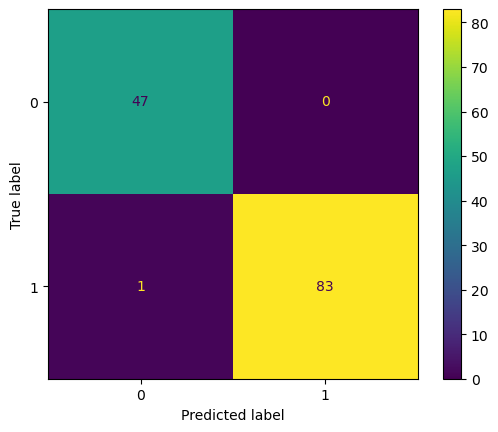

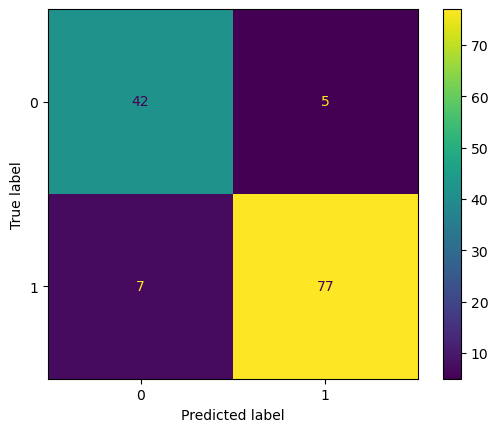

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

clf1 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=4))
clf1.fit(X_train,y_train)
x_pred = clf1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, x_pred)

clf = SGDClassifier(max_iter=1000000)
clf.fit(X_train,y_train)
x_pred2 = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,x_pred2)

In [3]:
#Soit la nouvelle donnée

#X_new=[[14, 12, 75, 495, 6.1e-02, 3.2e-02, 2.10e-02,
#  1.3e-02, 1.5e-01, 7e-02, 1.7e-01, 4.80e-01, 1.4e+00, 0.868e+01,
 # 5.71e-03, 1.2e-02, 1.8e-02, 5.7e-03, 1.8e-02, 1.881e-03, 1.4e+01,
#  1.7e+01, 9.040e+01, 5.350e+02, 9.87e-02, 1.2e-01, 1.01e-01, 5.5e-02,
#  2.4e-01, 6.87e-02]]



Trouver l'étiquette pour cette donnée par  les deux méthodes qui donnent le meilleur et le pire  des scores